# STAT 4010/5010 Unit #6 Code: GLMs

The goal of this notebook is to learn to model data using generalized linear models, and interpret the results.


## Problem #1
In January 1986, the space shuttle Challenger exploded shortly after launch. An investigation was launched into the cause of the crash and attention focused on the rubber O-ring seals in the rocket boosters. At lower temperatures, rubber becomes more brittle and is a less effective sealant. At the time of the launch, the temperature was 31°F. Could the failure of the O-rings have been predicted? In the 23 previous shuttle missions for which data exists, some evidence of damage due to blow by and erosion was recorded on some O-rings. Each shuttle had two boosters, each with three O-rings. For each mission, we know the number of O-rings out of six showing some damage and the launch temperature. 

The 'orings' is a data frame with 23 observations on the following 2 variables.

1. temp:  Ambient temperature (Fahrenheit) at launch time
2. damage: Number of damaged 'O' rings (out of a total of 6)

#### (a) Construct a new variable called prop, which is the proportion of damaged 'O' rings. Plot prop against temperature. What do you notice about this plot?

In [6]:
rm(list = ls())
#library(faraway) #If you have trouble loading the faraway package, 
#please load the data file given in the Unit #6 folder on canvas.
#library(MASS)
#install.packages('aod')
#library(aod) #wald.test
#library(lmtest) #lrtest (likelihood ratio test--same as anova)

data(orings)#If you have trouble loading the faraway package, 
#please load the data file given in the Unit #6 folder on canvas.

head(orings)



temp,damage
53,5
57,1
58,1
63,1
66,0
67,0


#### (b) Let's use the 'glm' function for fitting the logit model (logistic regression). The first argument will be the model: RESPONSE ~ PREDICTORS. For binomial response data, we need two pieces of information about the response values—y and n. Thus for binomial families, the response can be specified as a two-column matrix with the columns giving the numbers of successes and failures. You'll also need to specify the family argument, and the data argument. Other arguments should include 'data' and 'family'. Use ?glm to specify these arguments.


In [7]:
glmod1 = glm(data = orings, cbind(orings$damage, 6-orings$damage)~temp, family = binomial)
summary(glmod1)


Call:
glm(formula = cbind(orings$damage, 6 - orings$damage) ~ temp, 
    family = binomial, data = orings)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9529  -0.7345  -0.4393  -0.2079   1.9565  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 11.66299    3.29626   3.538 0.000403 ***
temp        -0.21623    0.05318  -4.066 4.78e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.898  on 22  degrees of freedom
Residual deviance: 16.912  on 21  degrees of freedom
AIC: 33.675

Number of Fisher Scoring iterations: 6


In [10]:
orings = cbind(orings, orings$damage/6)
head(orings)

temp,damage,orings$damage/6
53,5,0.8333333
57,1,0.1666667
58,1,0.1666667
63,1,0.1666667
66,0,0.0000000
67,0,0.0000000


In [13]:
names(orings)[3] = 'prob'
head(orings)

temp,damage,prob
53,5,0.8333333
57,1,0.1666667
58,1,0.1666667
63,1,0.1666667
66,0,0.0000000
67,0,0.0000000


#### (c) Plot the data again with the logit model. You can do this easily with the ilogit function.

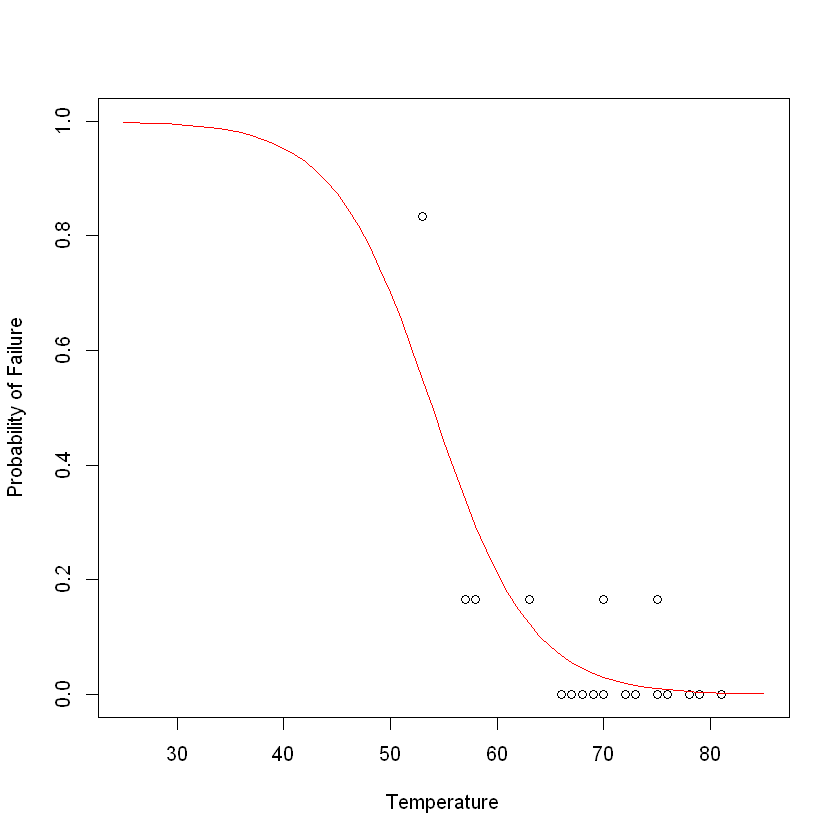

In [18]:
plot(orings$temp, orings$prob, xlim = c(25,85), ylim = c(0,1), xlab = 'Temperature', ylab = 'Probability of Failure')
x = seq(25,85,1)
lines(x, ilogit(11.66299-0.21623 * x), col = 'red')

#### (d) Now let's check the interpretation of $\widehat{\beta}_1$. Create a new temperature value of 45 and 46 degrees. Calculuate the odds of failure at 45 and 46 degrees. What is the ratio of these two odds? 

In [23]:
df1 = data.frame(temp = 45)
df2 = data.frame(temp = 46)
odds1 = exp(coef(glmod1)[1] + coef(glmod1)[2] * df1)
odds2 = exp(coef(glmod1)[1] + coef(glmod1)[2] * df2)
odds2/odds1
exp(coef(glmod1)[2])

temp
0.8055471


temp 
0.8055471

#### (e) Compute confidence intervals for the model parameters "by hand".

In [26]:
cat('95% CI for Beta 0: (', coef(glmod1)[1] - qnorm(0.975) * 3.29626, ',', coef(glmod1)[1] + qnorm(0.975) * 3.29626, ') \n')
cat('95% CI for Beta 1: (', coef(glmod1)[2] - qnorm(0.975) * 0.05318, ',', coef(glmod1)[2] + qnorm(0.975) * 0.05318, ')')

95% CI for Beta 0: ( 5.202439 , 18.12354 ) 
95% CI for Beta 1: ( -0.3204645 , -0.1120028 )

#### (f) Now compute them using confint(glmod). Notice that these intervals are slightly different; they are based on the profile likelihood and do not assume asymptotic normality. They are more accurate for small sample sizes. Profile likelihood confidence intervals don’t assume normality of the estimator and appear to perform better for small samples sizes than Wald CIs (above). They are, nonetheless, still based on an asymptotic approximation – the asymptotic chi-square distribution of the log likelihood ratio test statistic. (for more info: http://www.math.umt.edu/patterson/ProfileLikelihoodCI.pdf)

In [27]:
confint(glmod1)

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),5.575195,18.737598
temp,-0.332657,-0.120179


#### (g) Predict the probability of faulire at Temp = 45 degrees.


In [28]:
pred = predict.glm(glmod1, df1, se = T, type = 'response')
pred$fit

1 
0.8735231

## Problem #2 

A researcher is interested in how variables, such as gre (Graduate Record Exam scores), gpa (grade point average) and prestige of the undergraduate institution (rank), effect admission into graduate school. The response variable, admit/don't admit, is a binary variable.



In [29]:
admission = read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
head(admission)


admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


#### (a) Perform logistic regression treating ${\tt admit}$ as the response. Be sure to treat ${\tt rank}$ as a categorical variable.

In [31]:
admission$rank = as.factor(admission$rank)
glmod2 = glm(data = admission, admit ~ ., family = 'binomial')
summary(glmod2)


Call:
glm(formula = admit ~ ., family = "binomial", data = admission)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


#### (b) Construct a reduced model without the ${\tt rank}$ variable. Conduct the likelihood ratio test to decide whether the reduced model is sufficient. You can do this using ${\tt anova}$ or ${\tt lrtest}$.

In [33]:
glmod2red = glm(data = admission, admit ~ gre + gpa, family = 'binomial')
anova(glmod2, glmod2red, test = 'LRT')

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
394,458.5175,NA,NA,NA
397,480.3440,-3,-21.82649,7.088456e-05


The likelihood ratio test gives us a chi squared statistic that is below 0.05 so at the 95% confidence level we can reject the $H_0:$ The reduced model is sufficent. We should use the model with rank predictor

## Problem #3

For each 30 Galapagos islands, we have a count of the number of plant species found on each island and the number that are endemic to that island. We also have five geographic variables for each island. 

1. Species: the number of plant species found on the island
2. Endemics: the number of endemic species
3. Area: the area of the island (km$^2$)
4. Elevation: the highest elevation of the island (m)
5. Nearest: the distance from the nearest island (km)
6. Scruz: the distance from Santa Cruz island (km)
7. Adjacent: the area of the adjacent island (square km)

#### (a) Remove the Endemics variable from the dataframe, and fit a linear model with Species as the respons and all other variables as predictors. Run some diagnostics and explain why this model is not the best fit.

In [39]:
#library(faraway) #If you have trouble loading the faraway package, 
#please load the data file given in the Unit #6 folder on canvas.
#library(tidyverse)
#library(ggplot2)
#library(gridExtra)

data(gala)
gala = gala[,-2]
head(gala)

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82
Daphne.Major,18,0.34,119,8.0,8.0,1.84



Call:
lm(formula = Species ~ ., data = gala)

Residuals:
     Min       1Q   Median       3Q      Max 
-111.679  -34.898   -7.862   33.460  182.584 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.068221  19.154198   0.369 0.715351    
Area        -0.023938   0.022422  -1.068 0.296318    
Elevation    0.319465   0.053663   5.953 3.82e-06 ***
Nearest      0.009144   1.054136   0.009 0.993151    
Scruz       -0.240524   0.215402  -1.117 0.275208    
Adjacent    -0.074805   0.017700  -4.226 0.000297 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 60.98 on 24 degrees of freedom
Multiple R-squared:  0.7658,	Adjusted R-squared:  0.7171 
F-statistic:  15.7 on 5 and 24 DF,  p-value: 6.838e-07


Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


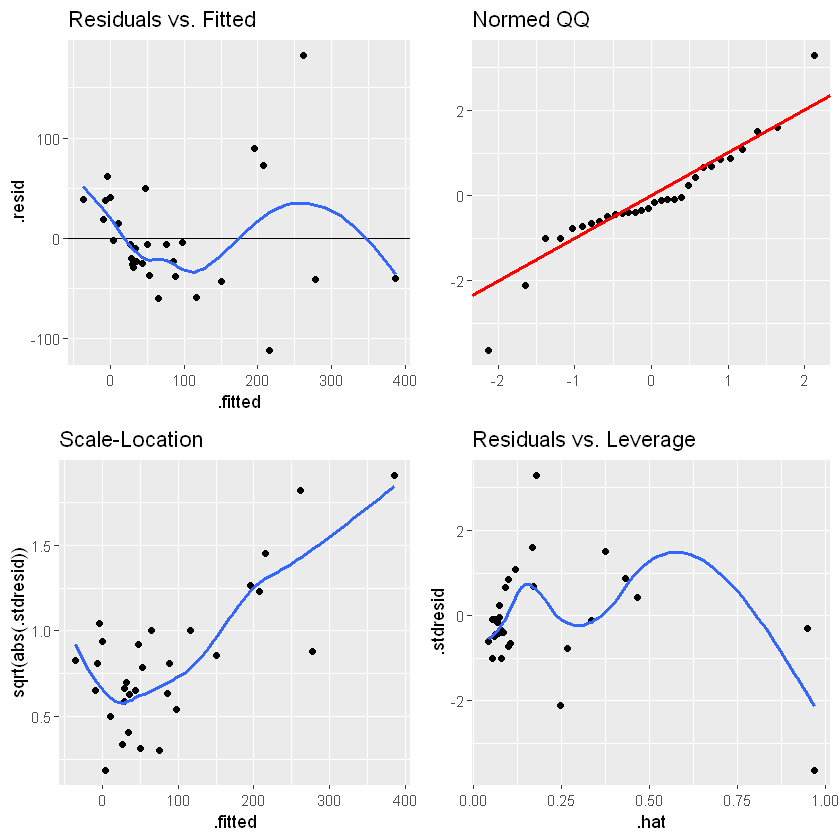

In [40]:
lmod3 = lm(data = gala, Species ~ .)
summary(lmod3)
p1 <- qplot(data = lmod3, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = lmod3, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = lmod3, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = lmod3, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

We can see several issues with our MLR model. The fitted vs. redisuals plot shows clustering and non-constant variance, specifically that as the fitted values get large the residuals do as well. The QQ plot shows serious issues with normally distibuted errors as we can see by the points failing to cluster around our y = x line. Lastly we seem to have 1 influencial outlier seen on our scale-residual plot in the bottom right corner.

#### (b) Recall that a square root transformation of the response might be helpful when the nonconstant variance assumption is violated. Try this transformation. 


Call:
lm(formula = sqrt(Species) ~ ., data = gala)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5572 -1.4969 -0.3031  1.3527  5.2110 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.3919243  0.8712678   3.893 0.000690 ***
Area        -0.0019718  0.0010199  -1.933 0.065080 .  
Elevation    0.0164784  0.0024410   6.751 5.55e-07 ***
Nearest      0.0249326  0.0479495   0.520 0.607844    
Scruz       -0.0134826  0.0097980  -1.376 0.181509    
Adjacent    -0.0033669  0.0008051  -4.182 0.000333 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.774 on 24 degrees of freedom
Multiple R-squared:  0.7827,	Adjusted R-squared:  0.7374 
F-statistic: 17.29 on 5 and 24 DF,  p-value: 2.874e-07


Warning message:
"`stat` is deprecated"`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


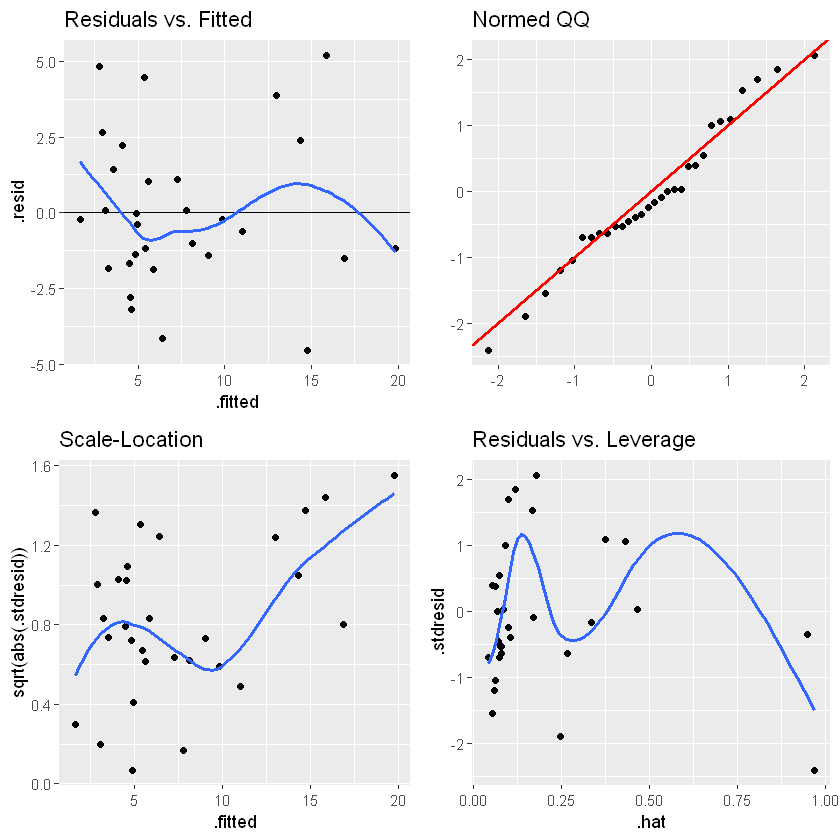

In [41]:
lmod3sqrt = lm(data = gala, sqrt(Species) ~ .)
summary(lmod3sqrt)
p1 <- qplot(data = lmod3sqrt, x = .fitted, y = .resid) + geom_hline(yintercept = 0) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Fitted')
p2 <- qplot(data = lmod3sqrt, sample =.stdresid, stat = "qq") + geom_abline(size = 1, color = 'red') + ggtitle('Normed QQ')
p3 <- qplot(data = lmod3sqrt, x = .fitted, y = sqrt(abs(.stdresid))) + geom_smooth(se = FALSE) + ggtitle('Scale-Location')
p4 <- qplot(data = lmod3sqrt, .hat, .stdresid) + geom_smooth(se = FALSE) + ggtitle('Residuals vs. Leverage')
grid.arrange(p1,p2,p3,p4)

We can see that some of the issues have been solved. The homoscedasticity and normally distibuted errors look significantly better, but the scale location plot line does still rise at the higher end of the residuals so it is not perfect.

#### (c) One issue with a transformation is that it makes interpretation less natural. Let's try a Poisson regression (with no transformation on the repsonse).

In [42]:
glmod3 = glm(data = gala, Species ~ ., family = poisson)
summary(glmod3)


Call:
glm(formula = Species ~ ., family = poisson, data = gala)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-8.2752  -4.4966  -0.9443   1.9168  10.1849  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.155e+00  5.175e-02  60.963  < 2e-16 ***
Area        -5.799e-04  2.627e-05 -22.074  < 2e-16 ***
Elevation    3.541e-03  8.741e-05  40.507  < 2e-16 ***
Nearest      8.826e-03  1.821e-03   4.846 1.26e-06 ***
Scruz       -5.709e-03  6.256e-04  -9.126  < 2e-16 ***
Adjacent    -6.630e-04  2.933e-05 -22.608  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 3510.73  on 29  degrees of freedom
Residual deviance:  716.85  on 24  degrees of freedom
AIC: 889.68

Number of Fisher Scoring iterations: 5


#### (d) Interpret the parameter associated with Nearest. 

In [43]:
exp(coef(glmod3)[4])

Nearest 
1.008865

Provided that the model assumptions are correct, for each one unit increase in Nearest we exect to see an average increase of 1.01 in Species, all other covariates being equal.

#### (e) Calculate the deviance for Poisson regression. Does this value show up in the summary? Also, check the goodness of fit of this model using Pearson's $\chi^2$ statistic. What do you conclude about the fit?

In [46]:
dev = with(gala, -2 * sum(Species * log(fitted(glmod3)/Species) - (Species - fitted(glmod3))))
cat('Residual Deviance:', dev, '\n')
chisq = with(gala, sum((Species - fitted(glmod3))^2/fitted(glmod3)))
cat('Chi Squared Stat:', chisq, '\n')
pval = 1 - pchisq(chisq,24)
cat('P-value:', pval)

Residual Deviance: 716.8458 
Chi Squared Stat: 761.9792 
P-value: 0

Our p-value is machine 0 so we can reject our $H_0:$ the model is sufficent. 

## Problem #4

Research another type of GLM (beyond binomial and Poisson), find a dataset that is reasonably modeled by that GLM, and model it. Does the model fit well?

yield,gravity,pressure,temp10,temp,batch
0.122,50.8,8.6,190,205,1
0.223,50.8,8.6,190,275,1
0.347,50.8,8.6,190,345,1
0.457,50.8,8.6,190,407,1
0.080,40.8,3.5,210,218,2
0.131,40.8,3.5,210,273,2



Call:
betareg(formula = yield ~ batch + temp, data = GasolineYield)

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.8750 -0.8149  0.1601  0.8384  2.0483 

Coefficients (mean model with logit link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.1595710  0.1823247 -33.784  < 2e-16 ***
batch1       1.7277289  0.1012294  17.067  < 2e-16 ***
batch2       1.3225969  0.1179020  11.218  < 2e-16 ***
batch3       1.5723099  0.1161045  13.542  < 2e-16 ***
batch4       1.0597141  0.1023598  10.353  < 2e-16 ***
batch5       1.1337518  0.1035232  10.952  < 2e-16 ***
batch6       1.0401618  0.1060365   9.809  < 2e-16 ***
batch7       0.5436922  0.1091275   4.982 6.29e-07 ***
batch8       0.4959007  0.1089257   4.553 5.30e-06 ***
batch9       0.3857930  0.1185933   3.253  0.00114 ** 
temp         0.0109669  0.0004126  26.577  < 2e-16 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value Pr(>|z|)    
(phi) 


Call:
betareg(formula = yield ~ batch + temp, data = GasolineYield, link = "loglog")

Standardized weighted residuals 2:
    Min      1Q  Median      3Q     Max 
-2.2151 -0.8785  0.1526  0.8737  3.0834 

Coefficients (mean model with loglog link):
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.7937944  0.0579177 -48.237  < 2e-16 ***
batch1       0.9038714  0.0347387  26.019  < 2e-16 ***
batch2       0.6553991  0.0376683  17.399  < 2e-16 ***
batch3       0.7684237  0.0378459  20.304  < 2e-16 ***
batch4       0.5375955  0.0335027  16.046  < 2e-16 ***
batch5       0.5516613  0.0346755  15.909  < 2e-16 ***
batch6       0.5198331  0.0351349  14.795  < 2e-16 ***
batch7       0.2921514  0.0340681   8.576  < 2e-16 ***
batch8       0.2504792  0.0349788   7.161 8.02e-13 ***
batch9       0.1871284  0.0383089   4.885 1.04e-06 ***
temp         0.0053645  0.0001341  40.008  < 2e-16 ***

Phi coefficients (precision model with identity link):
      Estimate Std. Error z value P

Warning message:
"contrasts dropped from factor batch"Warning message:
"contrasts dropped from factor batch"

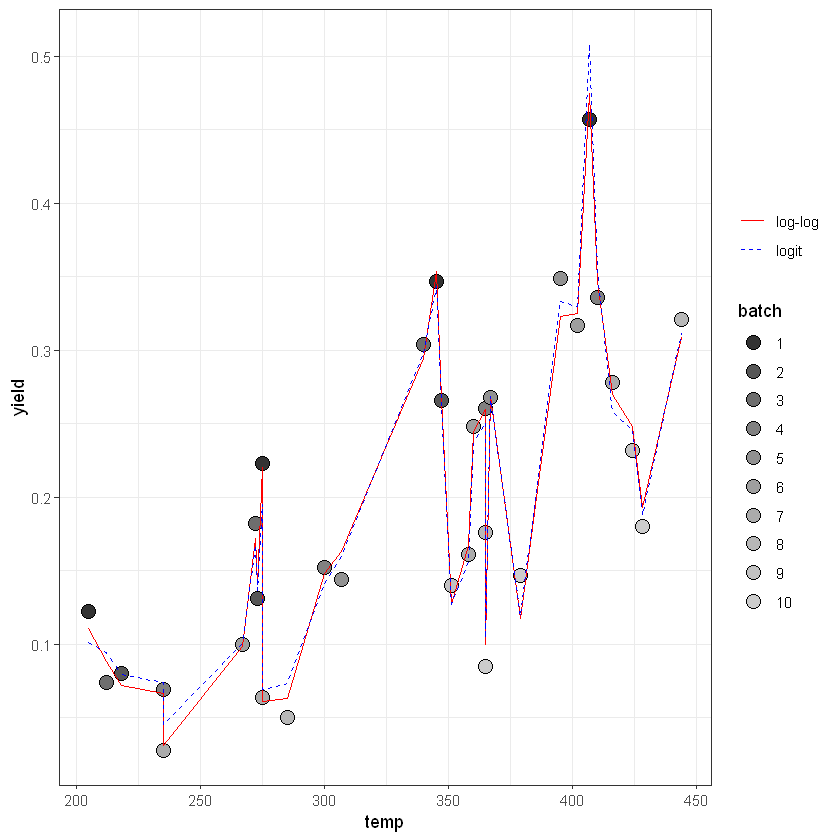

In [56]:
#https://cran.r-project.org/web/packages/betareg/vignettes/betareg.pdf
#beta regression is not included in the glm function families, but the beta family of distributions is expo
#install.packages('betareg')
#library(betareg)
data('GasolineYield', package = 'betareg')
head(GasolineYield)
betamodlogit = betareg(data = GasolineYield, yield ~ batch + temp)
summary(betamodlogit)
betamodloglog = betareg(data = GasolineYield, yield ~ batch + temp, link = 'loglog')
summary(betamodloglog)
ggplot(GasolineYield, aes(x = temp, y = yield)) +
  geom_point(size = 4, aes(fill = batch), shape = 21) +
  scale_fill_grey() +
  geom_line(aes(y = predict(betamodloglog, GasolineYield),
                colour = "log-log", linetype = "log-log")) +
  geom_line(aes(y = predict(betamodlogit, GasolineYield), 
                colour = "logit", linetype = "logit")) +
  scale_colour_manual("", values = c("red", "blue")) +
  scale_linetype_manual("", values = c("solid", "dashed")) +
  theme_bw()

This data is well suited for beta regression (unsuprising because it came with the package). This fit can be examined by looking at the precision and pseudo R-squared values. In addition different link functions can be used with beta regression, and in this case I have used the logit, and loglog functions. The loglog link function improves the pseudo R-squared value from 0.9617 to 0.9852 which means that this data is well explained by the regression model in either case. 